In [1]:
import trackintel as ti
pfs = ti.io.file.read_positionfixes_csv('pfs.csv', index_col='ID')
sp = ti.io.file.read_staypoints_csv('staypoints.csv', index_col='id')
tpls = ti.io.file.read_triplegs_csv('triplegs.csv', index_col='id')

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/trackintel/io/file.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/

In [2]:
# Generate locations from the staypoints.
new_sp, locs = ti.preprocessing.staypoints.generate_locations(staypoints=sp, method='dbscan', epsilon=100, num_samples=3, agg_level='user')

/usr/local/lib/python3.9/site-packages/trackintel/geogr/distances.py:227: UserWarning: The CRS of your data is not defined.
  warnings.warn("The CRS of your data is not defined.")
/usr/local/lib/python3.9/site-packages/pygeos/io.py:89: UserWarning: The shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the PyGEOS GEOS version (3.10.4-CAPI-1.16.2). Conversions between both will be slow
  warnings.warn(


In [3]:
# remove none location id
new_sp.dropna(subset=['location_id'], inplace=True)

In [4]:
# Add a flag whether or not a staypoint is considered an activity.
activity_sp = ti.analysis.labelling.create_activity_flag(staypoints= new_sp, method='time_threshold', time_threshold=15)

In [5]:
activity_sp

,user_id,started_at,finished_at,geom,location_id,is_activity
id,,,,,,
0,0,2022-09-20 14:10:57-04:00,2022-09-20 14:13:46-04:00,POINT (-81.75290 30.27120),0,False
1,0,2022-09-20 23:40:41-04:00,2022-09-20 23:47:54-04:00,POINT (-81.75290 30.27120),0,False
2,0,2022-09-21 01:33:56-04:00,2022-09-21 01:36:24-04:00,POINT (-81.82170 30.28510),1,False
5,0,2022-09-21 13:44:59-04:00,2022-09-21 13:47:33-04:00,POINT (-81.60281 30.19179),2,False
6,0,2022-09-21 21:32:16-04:00,2022-09-21 21:35:03-04:00,POINT (-81.66240 30.45000),3,False
...,...,...,...,...,...,...
350990,5170,2022-10-31 23:42:07-04:00,2022-10-31 23:45:14-04:00,POINT (-81.58729 30.36680),20502,False
350991,5171,2022-10-25 14:08:00-04:00,2022-10-25 14:36:43-04:00,POINT (-81.74837 30.20221),20503,True
350992,5171,2022-10-28 14:16:55-04:00,2022-10-28 14:31:46-04:00,POINT (-81.74885 30.20228),20503,False


In [6]:
trip_sp, trip_tpls, trips = ti.preprocessing.triplegs.generate_trips(staypoints= activity_sp, triplegs=tpls)

/usr/local/lib/python3.9/site-packages/trackintel/preprocessing/triplegs.py:275: UserWarning: Staypoint crs is not set. Assuming same as for triplegs.
  warnings.warn("Staypoint crs is not set. Assuming same as for triplegs.")
/usr/local/lib/python3.9/site-packages/trackintel/preprocessing/triplegs.py:277: UserWarning: Tripleg crs is not set. Assuming same as for staypoints.
  warnings.warn("Tripleg crs is not set. Assuming same as for staypoints.")


In [7]:
trips_with_tours, tour = ti.preprocessing.trips.generate_tours(trips, activity_sp, print_progress=True)

User tour generation: 100%|██████████| 5153/5153 [00:47<00:00, 109.58it/s]


In [8]:
tour

,user_id,started_at,finished_at,origin_staypoint_id,destination_staypoint_id,trips,location_id
id,,,,,,,
0,23,2022-09-21 22:35:06-04:00,2022-09-21 22:52:05-04:00,1922.0,1926.0,[2531],102
1,77,2022-09-22 17:44:33-04:00,2022-09-22 17:47:18-04:00,6244.0,6246.0,[6149],326
2,77,2022-09-26 17:43:10-04:00,2022-09-26 17:47:19-04:00,6583.0,6585.0,[6194],326
3,77,2022-09-26 18:03:07-04:00,2022-09-26 18:06:20-04:00,6585.0,6587.0,[6195],326
4,77,2022-09-28 15:12:05-04:00,2022-09-28 18:06:15-04:00,6747.0,6773.0,"[6215, 6216]",326
...,...,...,...,...,...,...,...
798,4801,2022-10-21 16:13:18-04:00,2022-10-21 16:19:53-04:00,341969.0,341971.0,[399410],19835
799,4801,2022-10-21 16:39:11-04:00,2022-10-21 16:42:21-04:00,341971.0,341972.0,[399411],19835
800,4801,2022-10-22 16:39:06-04:00,2022-10-22 16:39:56-04:00,342000.0,342001.0,[399423],19835


In [9]:
# Find the user_id with the most occurrences and Visualization.
top_id = tour['user_id'].value_counts().idxmax()
tours_top = trips_with_tours[trips_with_tours['user_id'] == top_id]
pfs_top = pfs.loc[pfs['user_id'] == top_id]
sp_top = trip_sp.loc[trip_sp['user_id'] == top_id]
tours_top

,user_id,started_at,finished_at,geom,origin_staypoint_id,destination_staypoint_id,tour_id
id,,,,,,,
164631,1716,2022-09-05 00:49:34-04:00,2022-09-05 01:01:50-04:00,"MULTIPOINT (-81.81369 30.35877, -81.81336 30.3...",NaN,NaN,NaN
164632,1716,2022-09-05 02:04:10-04:00,2022-09-05 02:04:25-04:00,"MULTIPOINT (-81.77254 30.32351, -81.77254 30.3...",NaN,NaN,NaN
164633,1716,2022-09-05 03:12:07-04:00,2022-09-05 03:12:57-04:00,"MULTIPOINT (-81.81345 30.35866, -81.81346 30.3...",NaN,NaN,NaN
164634,1716,2022-09-05 04:02:11-04:00,2022-09-05 04:02:22-04:00,"MULTIPOINT (-81.81335 30.35827, -81.81336 30.3...",NaN,NaN,NaN
164635,1716,2022-09-05 04:35:10-04:00,2022-09-05 04:41:20-04:00,"MULTIPOINT (-81.81329 30.35883, -81.81340 30.3...",NaN,NaN,NaN
...,...,...,...,...,...,...,...
165260,1716,2022-10-31 15:23:09-04:00,2022-10-31 15:45:23-04:00,"MULTIPOINT (-81.73581 30.34151, -81.81332 30.3...",150355.0,NaN,NaN
165261,1716,2022-10-31 16:50:35-04:00,2022-10-31 18:18:20-04:00,"MULTIPOINT (-81.73581 30.34150, -81.81332 30.3...",150358.0,NaN,NaN
165262,1716,2022-10-31 19:26:54-04:00,2022-10-31 20:42:58-04:00,"MULTIPOINT (-81.74960 30.36283, -81.72260 30.2...",NaN,NaN,NaN


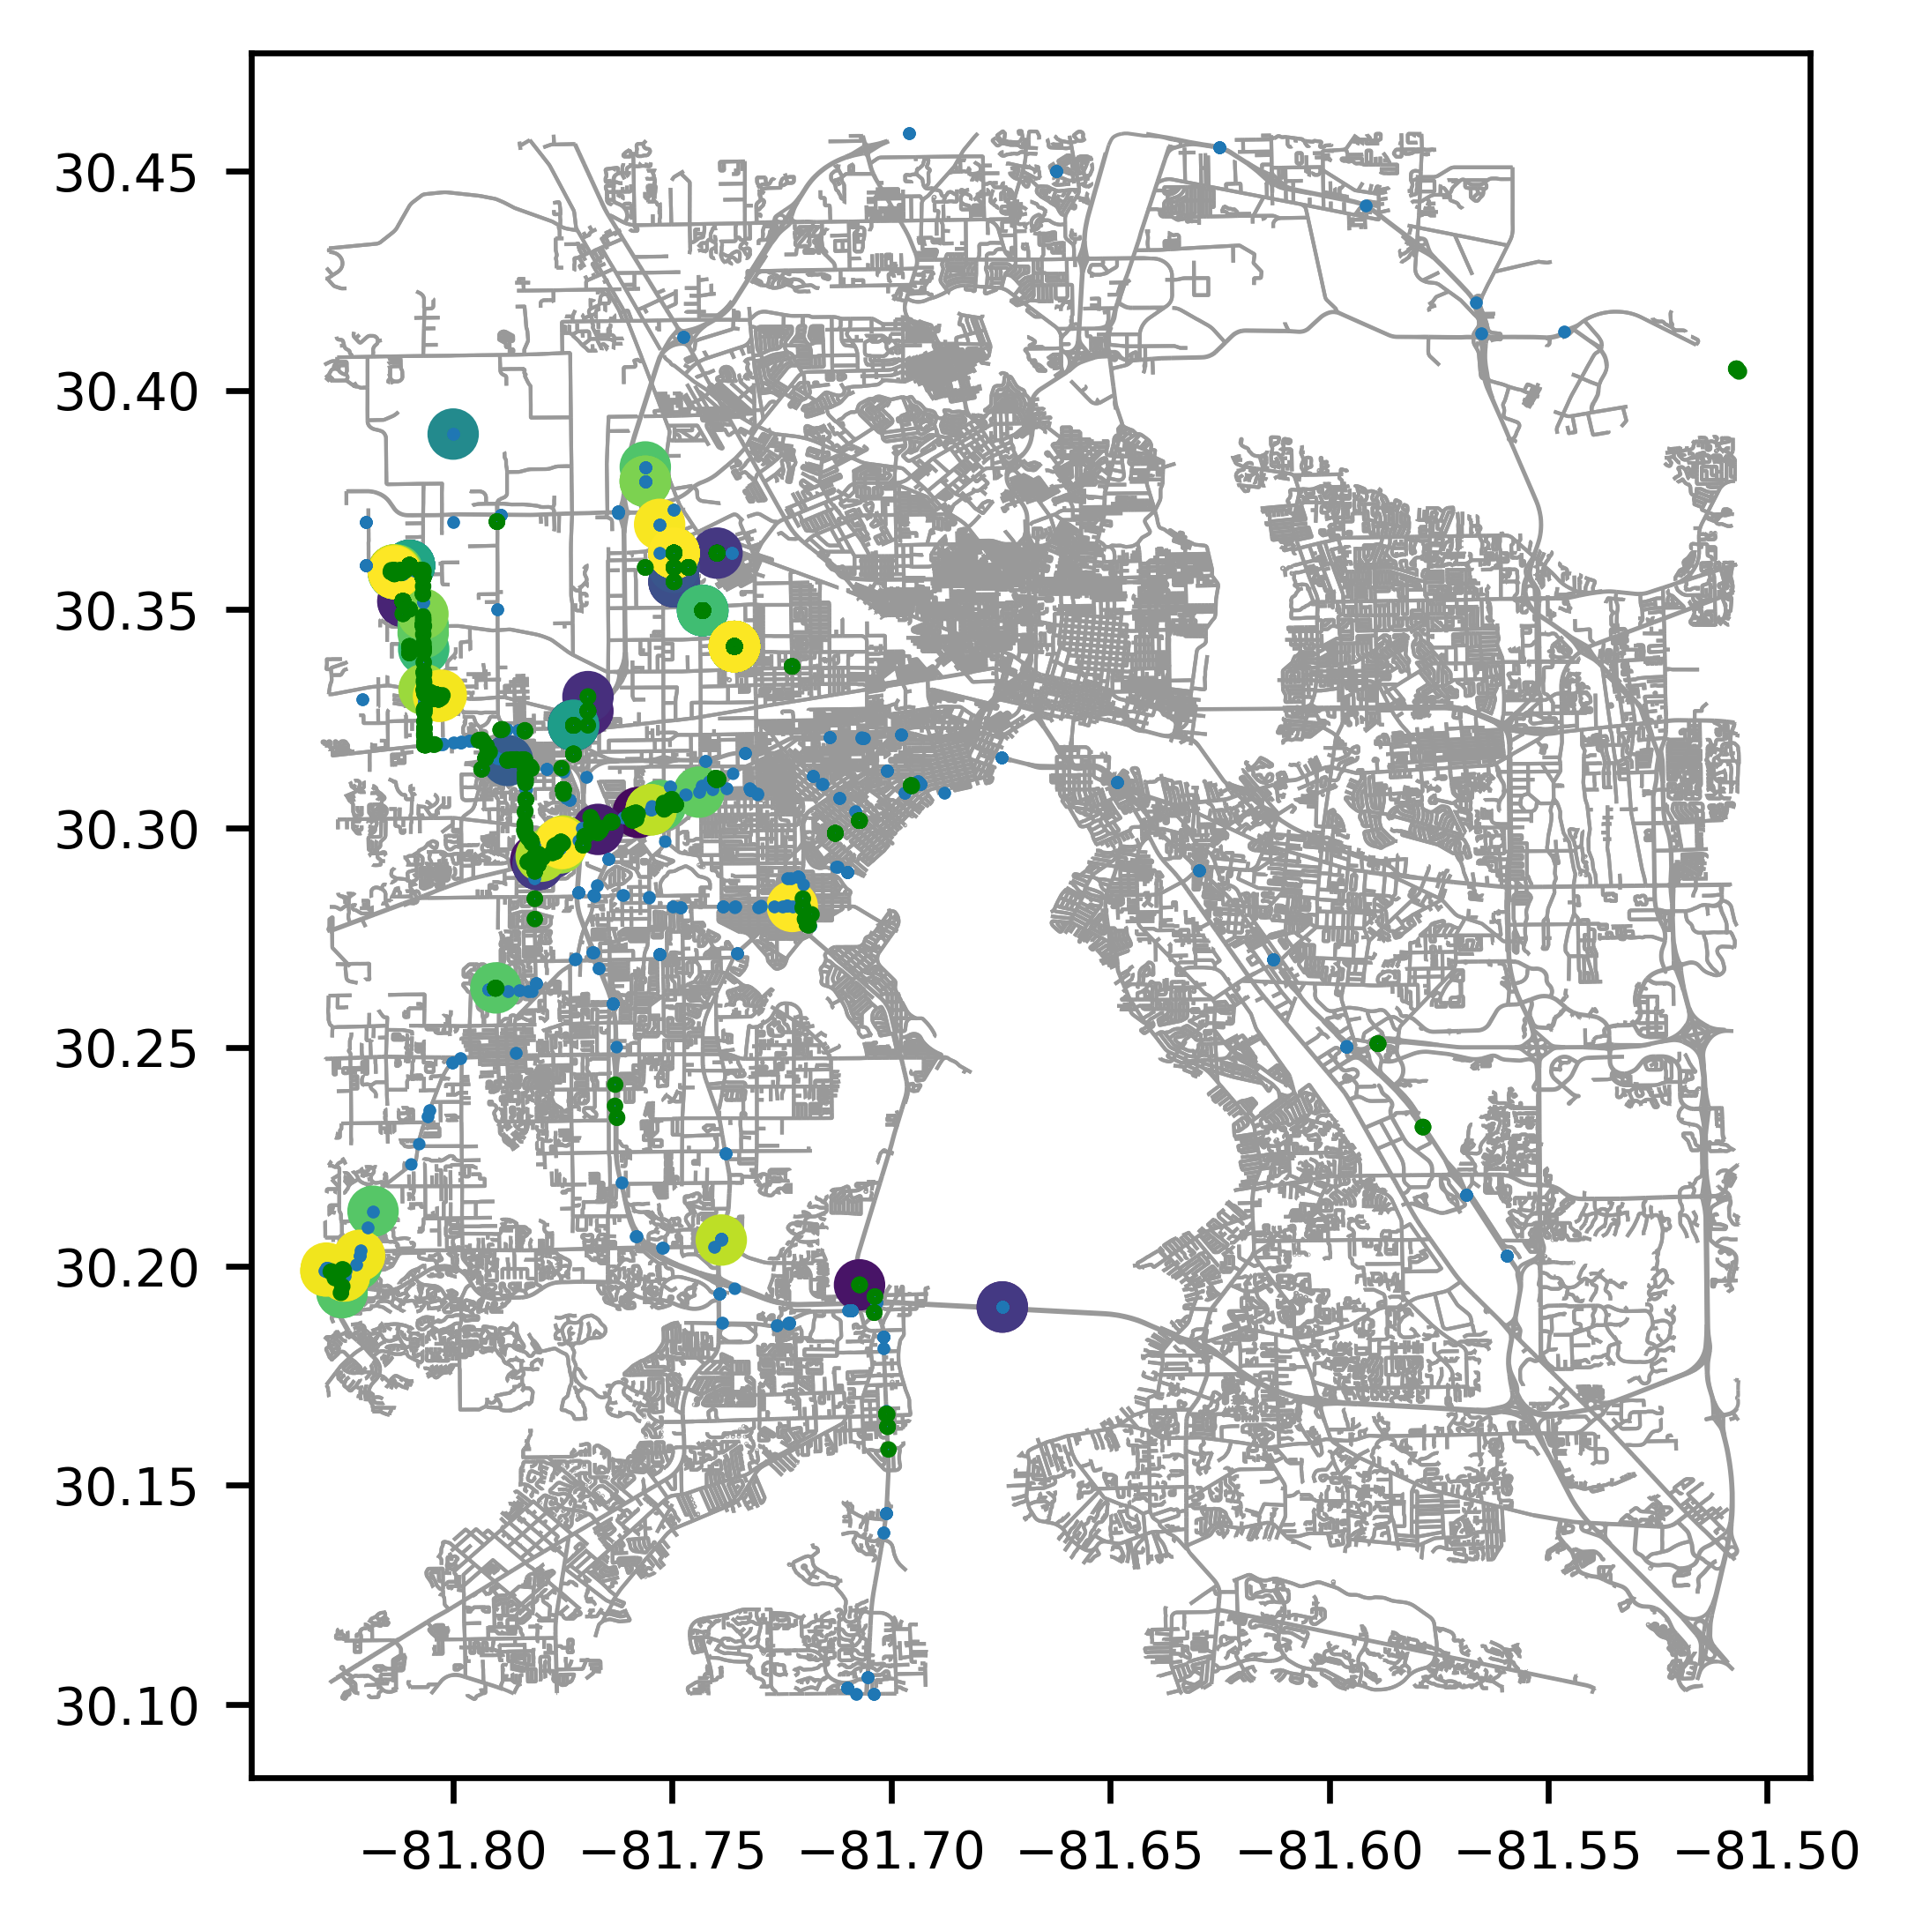

In [10]:
ti.visualization.triplegs.plot_triplegs(tours_top, positionfixes=pfs_top, staypoints=sp_top, plot_osm = True)